In [97]:
import os
from collections import defaultdict


import numpy as np
import scipy as sp
from scipy import misc, stats, linalg
import pandas as pd
from PIL import Image, ImageColor
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from pandas import DataFrame, Series


%matplotlib inline

In [98]:
DIRNAME_IMAGES = '/home/lankar/mirflickr'

COLOR = {'red': 0,
         'green': 1,
         'blue': 2}

In [99]:
image_names = [x for x in os.listdir(DIRNAME_IMAGES)]

In [100]:
len(image_names)

1000

In [101]:
data_static = DataFrame()
num = 0
d = []
for image_name in image_names[:100]:
    image = np.array(Image.open(DIRNAME_IMAGES+'/'+image_name))
    data = []
    for func in (np.mean, np.var, sp.stats.skew, sp.stats.kurtosis):
        for name, num in COLOR.items():
            a = image[:, :, num].ravel()
            data.append(func(a))
    d.append([image_name, *data])

data_static = pd.DataFrame.from_records(d)
data_static = data_static.rename(columns={0: 'name'}).set_index('name')

In [102]:
# normalize
for column in range(7, 13):
    data_static[column]=(data_static[column]-data_static[column].min()) / (data_static[column].max()-data_static[column].min())

In [103]:
data_static.head(100)

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
im10078.jpg,165.551291,134.935616,98.170917,1369.448169,1872.290831,3013.761747,0.070216,0.424044,0.276311,0.001142,0.039392,0.010214
im10412.jpg,151.116402,126.286871,128.228222,5233.346132,4047.665237,3858.639092,0.057583,0.306156,0.175659,0.001046,0.034194,0.011462
im1150.jpg,84.923393,71.142763,40.941207,9561.100972,7394.649481,3252.480646,0.103142,0.507967,0.372303,0.000446,0.037698,0.037927
im1498.jpg,117.271792,124.397184,108.158293,3243.911425,2484.533861,3349.492639,0.082510,0.317901,0.226105,0.000971,0.049462,0.006437
im1029.jpg,127.229995,125.138526,89.029192,6148.833032,5862.935976,8536.718443,0.093531,0.469754,0.313887,0.000619,0.032561,0.010814
im1521.jpg,96.107792,95.963744,95.963592,9792.289061,9812.472118,9812.472546,0.093969,0.444771,0.271279,0.000062,0.007410,0.001880
im1513.jpg,151.039851,135.158645,145.580384,5534.296236,9345.864016,5659.625576,0.067437,0.369959,0.233326,0.000260,0.002368,0.000000
im150.jpg,53.055343,53.055343,53.055343,3139.505570,3139.505570,3139.505570,0.132052,0.610704,0.378476,0.003674,0.157303,0.044767
im1105.jpg,80.178156,82.294318,83.284366,3544.637504,3962.439419,4445.906841,0.097229,0.463052,0.287368,0.001364,0.052678,0.012767


In [104]:
data_static.head()

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
im10078.jpg,165.551291,134.935616,98.170917,1369.448169,1872.290831,3013.761747,0.070216,0.424044,0.276311,0.001142,0.039392,0.010214
im10412.jpg,151.116402,126.286871,128.228222,5233.346132,4047.665237,3858.639092,0.057583,0.306156,0.175659,0.001046,0.034194,0.011462
im1150.jpg,84.923393,71.142763,40.941207,9561.100972,7394.649481,3252.480646,0.103142,0.507967,0.372303,0.000446,0.037698,0.037927
im1498.jpg,117.271792,124.397184,108.158293,3243.911425,2484.533861,3349.492639,0.082510,0.317901,0.226105,0.000971,0.049462,0.006437
im1029.jpg,127.229995,125.138526,89.029192,6148.833032,5862.935976,8536.718443,0.093531,0.469754,0.313887,0.000619,0.032561,0.010814


In [255]:
data_static[[1, 2, 3]].cov()

,1,2,3
1,1624.360285,1401.848439,1096.805612
2,1401.848439,1733.664205,1467.523605
3,1096.805612,1467.523605,1739.753900


In [256]:
data_static[[1,2,3]].mean()

1    107.734872
2    105.993300
3    100.791382
dtype: float64

## Gauss 

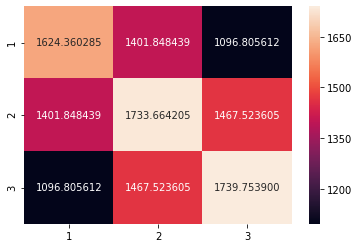

In [106]:
sns.heatmap(data_static[list(range(1, 4))].cov(),  annot=True, fmt='f')

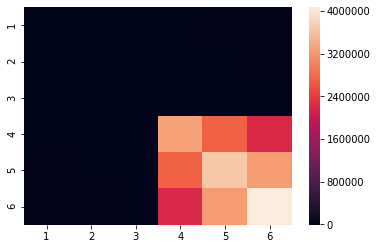

In [252]:
sns.heatmap(data_static[list(range(1, 7))].cov(), fmt='f')

In [108]:
data_static[list(range(1, 7))].cov()

,1,2,3,4,5,6
1,1624.360285,1401.848439,1096.805612,7.357027e+03,1.165901e+04,1.326981e+04
2,1401.848439,1733.664205,1467.523605,5.177997e+02,6.744568e+03,1.176005e+04
3,1096.805612,1467.523605,1739.753900,-6.988525e+03,1.014171e+03,6.385279e+03
4,7357.027394,517.799717,-6988.525350,3.303720e+06,2.713725e+06,2.214414e+06
5,11659.005788,6744.567771,1014.171127,2.713725e+06,3.697539e+06,3.252198e+06
6,13269.807776,11760.047375,6385.278803,2.214414e+06,3.252198e+06,4.065920e+06


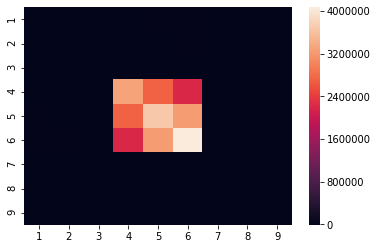

In [109]:
sns.heatmap(data_static[list(range(1, 10))].cov(), fmt='f')

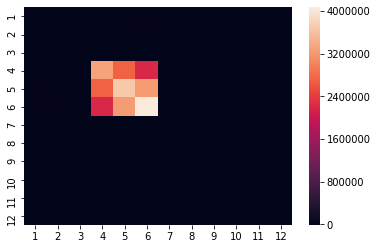

In [110]:
sns.heatmap(data_static[list(range(1, 13))].cov(), fmt='f')

## PCA

In [111]:
for image_name in image_names[20:21]:
    image = np.array(Image.open(DIRNAME_IMAGES+'/'+image_name))
    U, S, Vt = linalg.svd(image[:, :, 0])

In [112]:
image = np.array(Image.open(DIRNAME_IMAGES+'/'+image_name))

In [113]:
image_name

'im118.jpg'

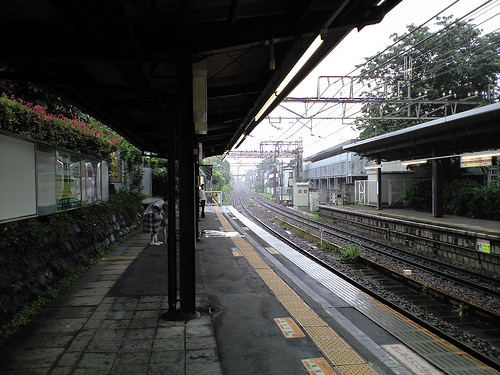

In [114]:
Image.fromarray(image, mode='RGB')

In [115]:
image.shape

(375, 500, 3)

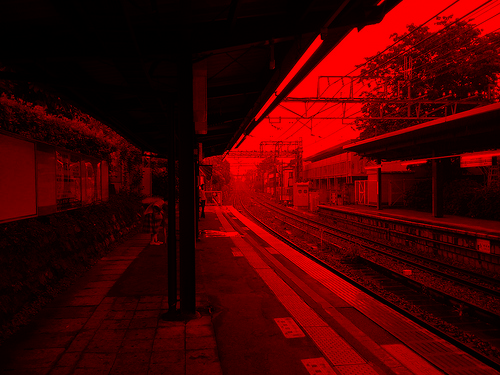

In [116]:
image_red = image.copy()
image_red[:, :, 1:] = 0
Image.fromarray(image_red, mode='RGB')

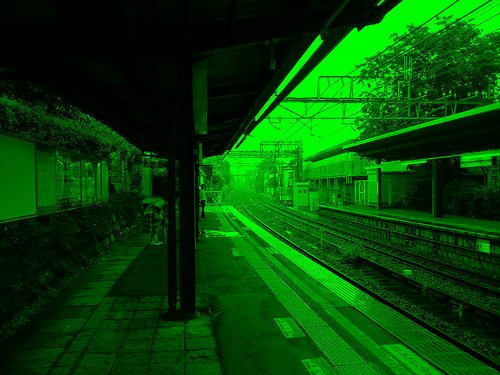

In [117]:
image_green = image.copy()
image_green[:, :, 0] = 0
image_green[:, :, 2] = 0
Image.fromarray(image_green, mode='RGB')

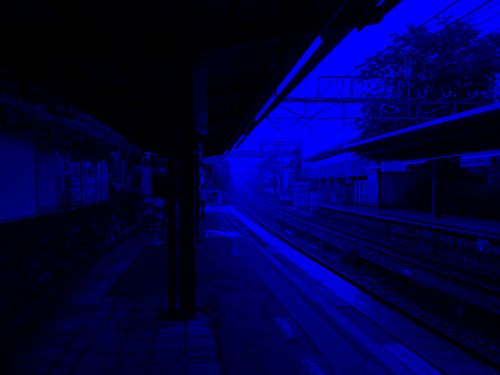

In [184]:
image_blue = image.copy()
image_blue[:, :, :2] = 0
image_blue[:, :, :2] = 0
Image.fromarray(image_blue, mode='RGB')

In [225]:
U.shape, S.shape, Vt.shape

((375, 375), (375,), (500, 500))

In [120]:
def pca(image, components=0):
    '''
    if components == 0 then reconstruction all elements from s
    '''
    image_rec = np.zeros(image.shape, dtype=np.int8)
    for color in range(3):
        U, s, Vt = linalg.svd(image[:, :, color], full_matrices=False)
        S = np.zeros((U.shape[1], Vt.shape[0]))
        if 0 < components <= s.shape[0]:
            s_rec = np.append(s[:components], [0]*(s.shape[0] - components))
        else:
            s_rec = s
        S[:min(U.shape[1], Vt.shape[0]), :min(U.shape[1], Vt.shape[0])] = np.diag(s_rec)
        
        image_rec[:, :, color] = U @ S @ Vt
    return image_rec

In [247]:
mse = {}
uu=5105
for i in range(1, min(image.shape[:2])-3):
    image_new = pca(image, components=i)
    mse[i] = ((((image - image_new) ** 2).sum() ** 0.5)-uu)
    print('%3d : mse: %f' % (i, mse[i]))

  1 : mse: 24780.113937
  2 : mse: 17143.341893
  3 : mse: 18359.889964
  4 : mse: 16285.864125
  5 : mse: 14955.917651
  6 : mse: 14227.888377
  7 : mse: 13845.043667
  8 : mse: 14395.477789
  9 : mse: 14336.360986
 10 : mse: 14509.931889
 11 : mse: 13737.096566
 12 : mse: 12971.164665
 13 : mse: 12459.231068
 14 : mse: 12408.441352
 15 : mse: 11442.860859
 16 : mse: 11350.789164
 17 : mse: 11257.011459
 18 : mse: 11202.238148
 19 : mse: 10855.685230
 20 : mse: 10600.586649
 21 : mse: 10336.556916
 22 : mse: 10285.965109
 23 : mse: 10193.025592
 24 : mse: 10119.693527
 25 : mse: 10077.672723
 26 : mse: 9936.301008
 27 : mse: 9827.877017
 28 : mse: 9594.391892
 29 : mse: 9429.636631
 30 : mse: 9338.538417
 31 : mse: 9210.560520
 32 : mse: 9153.992847
 33 : mse: 8995.613355
 34 : mse: 8870.984044
 35 : mse: 8750.312194
 36 : mse: 8688.768919
 37 : mse: 8724.967715
 38 : mse: 8625.206226
 39 : mse: 8581.704023
 40 : mse: 8422.687792
 41 : mse: 8392.439424
 42 : mse: 8332.951964
 43 : mse

363 : mse: 14.456905
364 : mse: 7.802167
365 : mse: 10.832190
366 : mse: 8.273707
367 : mse: 4.631102
368 : mse: 2.493906
369 : mse: 2.415002
370 : mse: 1.040932
371 : mse: 0.192259


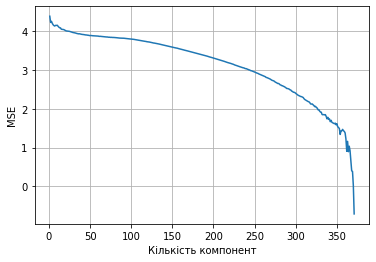

In [248]:
import math 
lists = sorted(mse.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
log_list=[]
for s in y:
    if s>0:
        log_list.append(math.log10(float(s)))

plt.plot(x, log_list)
plt.xlabel('Кількість компонент')
plt.ylabel('MSE')
plt.grid()

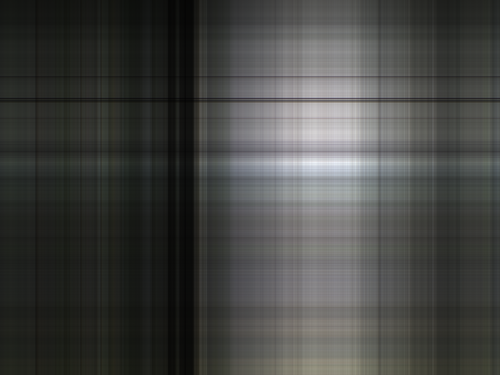

In [142]:
Image.fromarray(pca(image, components=1), mode='RGB')

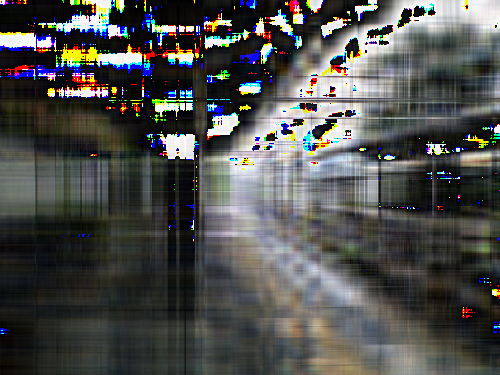

In [143]:
Image.fromarray(pca(image, components=10), mode='RGB')

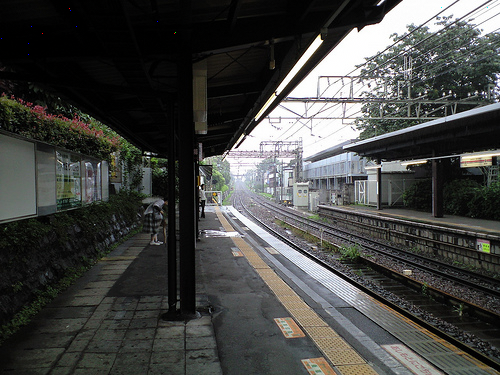

In [242]:
Image.fromarray(pca(image, components=350), mode='RGB')

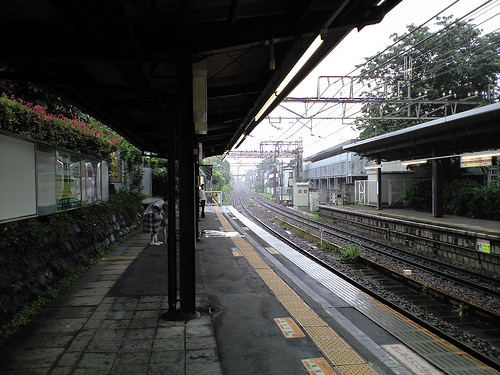

In [145]:
Image.fromarray(image, mode='RGB')

## Markov

In [399]:
#right
color = 0

stochastic_matrix = np.zeros((256, 256))

for i in range(image.shape[0]):
    for j in range(image.shape[1]-1):
        k1, k2 = image[i, j, color], image[i, j+1, color]
        stochastic_matrix[k1, k2] += 1
    

In [400]:
stochastic_matrix = (stochastic_matrix.T / stochastic_matrix.sum(axis=1)).T # normalize
stochastic_matrix

array([[0.52670911, 0.22529754, 0.04013285, ..., 0.        , 0.        ,
        0.        ],
       [0.12128362, 0.57715904, 0.17445336, ..., 0.        , 0.        ,
        0.        ],
       [0.02576708, 0.18528564, 0.51144262, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.31955381, 0.20800525,
        0.1843832 ],
       [0.        , 0.        , 0.        , ..., 0.12426835, 0.31787483,
        0.2372805 ],
       [0.        , 0.        , 0.        , ..., 0.07809224, 0.13417191,
        0.46095388]])

In [401]:
stochastic_matrix=np.log10(stochastic_matrix+0.000005)/np.log10(0.000005)
stochastic_matrix

array([[0.05252282, 0.12209588, 0.26342916, ..., 1.        , 1.        ,
        1.        ],
       [0.17283055, 0.04502912, 0.14304922, ..., 1.        , 1.        ,
        1.        ],
       [0.29972487, 0.13811401, 0.0549325 , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.09346282, 0.12863826,
        0.138514  ],
       [1.        , 1.        , 1.        , ..., 0.17083888, 0.0938944 ,
        0.11785045],
       [1.        , 1.        , 1.        , ..., 0.20889606, 0.16455712,
        0.06344763]])

In [402]:


# stochastic_matrix_5_log = stochastic_matrix_5 @ stochastic_matrix_5 @ stochastic_matrix_5 @ stochastic_matrix_5
# stochastic_matrix_5_log

In [403]:

stochastic_matrix_5=stochastic_matrix @ stochastic_matrix@ stochastic_matrix@ stochastic_matrix
stochastic_matrix_5

array([[6491140.11198516, 6925769.68196695, 7144366.19854684, ...,
        6575207.15940371, 5949328.66090527, 4763128.27821805],
       [6884746.37153603, 7346587.51221787, 7579230.02602013, ...,
        6982610.10878195, 6319590.79148992, 5061637.27399379],
       [7024100.87806948, 7495480.70130097, 7733009.95368585, ...,
        7125923.9635936 , 6449665.92839672, 5166274.32365499],
       ...,
       [6827268.01663551, 7288709.79344548, 7522845.91893888, ...,
        6963391.12629417, 6309415.03353273, 5063072.08254388],
       [6371802.68017094, 6803238.43189225, 7022453.92387499, ...,
        6506637.41417231, 5897040.7624972 , 4733959.074922  ],
       [5940747.73889947, 6343359.92498879, 6548217.85289544, ...,
        6071482.72422128, 5503560.59083935, 4419579.85090259]])

In [404]:
stochastic_matrix.all() # irreducible і рекурентна

True

In [405]:
(stochastic_matrix_5 * stochastic_matrix_5.T).all() # регулярна

True

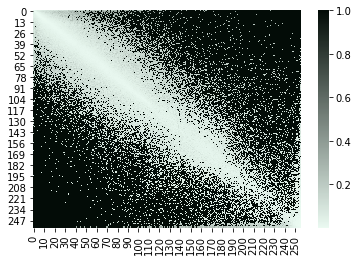

In [413]:
cmap = sns.light_palette("#030c07", as_cmap=True)
sns.heatmap(stochastic_matrix*stochastic_matrix*stochastic_matrix ,cmap=cmap,  fmt='f')

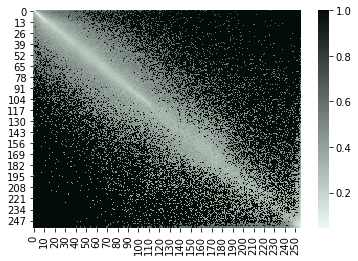

In [414]:
cmap = sns.light_palette("#030c07", as_cmap=True)
stochastic_matrix_5 = stochastic_matrix @ stochastic_matrix
sns.heatmap(stochastic_matrix,cmap=cmap, fmt='f')

In [378]:
stochastic_matrix_5.all()

True